# Keeling Curve

One of the biggest challenges we are facing today is the "wicked" problem of climate change.  Atmospheric  CO$_2$ levels are rising causing the planet to warm and a myriad of problems.  Unfortunately our leaders are not tackling this problem.  

The Keeling curve is the atmospheric plot of CO$_2$ in the atmosphere at Mauna Loa Observatory since the 1950's.  It was started by Charles David Keeling.  The results showed rapidly rising CO$_2$ in the atmosphere.  It is now probably one of the most famous data sets.  

Our goal today is to plot the Keeling Curve and maybe do some analyses with with it.  We will be using Python.  To make this work read all of my comments and type exactly as shown in each box that has a "In[1]" next to it.  Once you type it in press Shift-Enter to run that box.  

All the notes you are reading are in Markdown.  Where it says "code" above you can click markdown and add notes.  You can also find this whole notebook on my github page.  https://github.com/bmaillou/BigDataPython/blob/master/Keeling_Curve_For_Dusa.ipynb   If you right click on the raw button on the github page you can download it.  


### Python Libraries.  
I assume you downloaded anaconda Python 3.  
The first thing we need to do is turn on our python libraries.  Type exactly like below and press shift-enter

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

First go get CO2 data for Mauna Loa Obervatory we can go look at the wesite.  http://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations

Then we can actually look right at the data!
http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv

Double Click and the data should open in Excel.  It is "csv" file which means comma seperated variables.  

We will bring it into Python using the library Pandas.  

1.  We give it the URL.  You can copy and paste that from the webside
1.  We use a function called read_csv to read in the data
1.  we pass the function url so it knows where to find the file
1.  We tell it to skip the header rows
1.  We name the columns
1.  We tell it we want Dates to be important or the index column
1.  Finally we tell it to parse_dates or to treat dates like dates.
1.  if all goes well you should press shift-enter and nothing will happen

The great thing about this method is as soon as they update the website we can reload the data!


In [9]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/weekly_mlo.csv'
mlo=pd.read_csv(url,skiprows=44,names=['Date','CO2'],index_col='Date',parse_dates=True)


### We have the data in the computer!!!!!

### Now just print the data.  
I wrote mlo.head() to show just the first few lines to save paper. But you can just delelte the ".head()" and see what the data looks like!

In [60]:
print (mlo.head())

               CO2
Date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48


We could use tail to look at the end of the file and see how much CO$_2$ has increased!

In [62]:
print (mlo.tail())

               CO2
Date              
2018-07-28  408.08
2018-08-04  407.36
2018-08-11  407.28
2018-08-18  407.07
2018-08-25  406.63




What do we have?  The first easy steps are to describe the data.  What do the results mean?  How much data do you have????

In [61]:
mlo.describe()

,CO2
count,3082.000000
mean,354.058183
std,27.213353
min,313.040000
25%,329.420000
50%,351.600000
75%,375.775000
max,411.810000


### That isn't very visual.  Let's make a plot!  First the quick plot method!

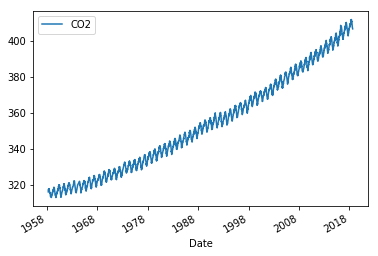

In [10]:
mlo.plot()

### Isn't that amazingly easy???  Look how beautiful!  
Lets make it nicer with axis labels.
1.  we turn on axis properties using fig,ax=plt.subplots() 
1.  Then assign the ax to the plot so we can adjust them.

Text(0,0.5,'CO$_2$(ppm)')

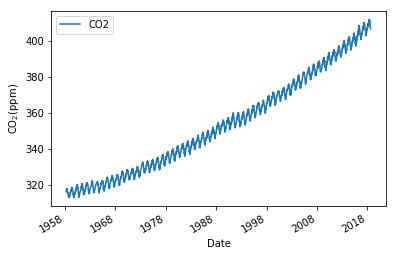

In [12]:
fig,ax=plt.subplots()
mlo.plot(ax=ax)
ax.set_ylabel('CO$_2$(ppm)')

### Here is just one year!

Text(0,0.5,'CO$_2$(ppm)')

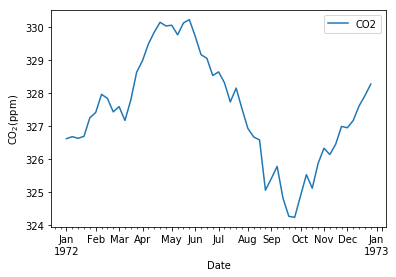

In [14]:
fig,ax=plt.subplots()
mlo['1972'].plot(ax=ax)
ax.set_ylabel('CO$_2$(ppm)')

### Can you make a plot for the year you were born?

### What if we want from 2008-2019?

Text(0,0.5,'CO$_2$(ppm)')

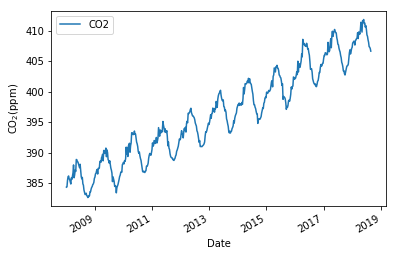

In [15]:
fig,ax=plt.subplots()
mlo['2008':'2019'].plot(ax=ax)
ax.set_ylabel('CO$_2$(ppm)')

## What is the first thing you notice about the graph????

### It has an annual cycle? Why?
What you are seeing is plant respiration in the northern hemisphere. CO$_2$ is taken up by plants in spring and summer.  Decay then releases the CO$_2$ the rest of the year

## Can we find annual averages and fit a trend to it?

I am going to do a few tricks to make our life easier.  
1.  we will resample our data to find yearly means.  
1.  'A' means annual
1.  I will average the CO2 and year data and make them a new x and y variable.  
1.  You can make the variables and print them

In [18]:
x=mlo.CO2.resample('A').mean().index.year
y=mlo.CO2.resample('A').mean()

In [24]:
print(x)

Int64Index([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Date')


In [25]:
print(y)

Date
1958-12-31    315.474000
1959-12-31    315.945417
1960-12-31    316.898868
1961-12-31    317.634038
1962-12-31    318.597708
1963-12-31    318.953673
1964-12-31    318.617097
1965-12-31    320.033462
1966-12-31    321.363061
1967-12-31    322.168800
1968-12-31    323.054423
1969-12-31    324.620769
1970-12-31    325.675769
1971-12-31    326.316346
1972-12-31    327.463962
1973-12-31    329.681346
1974-12-31    330.252308
1975-12-31    331.142885
1976-12-31    332.112353
1977-12-31    333.907547
1978-12-31    335.531154
1979-12-31    336.864423
1980-12-31    338.691731
1981-12-31    339.910769
1982-12-31    341.111923
1983-12-31    342.768679
1984-12-31    344.237083
1985-12-31    345.917451
1986-12-31    347.134808
1987-12-31    348.930000
                 ...    
1989-12-31    352.922308
1990-12-31    354.190000
1991-12-31    355.607885
1992-12-31    356.375000
1993-12-31    357.047885
1994-12-31    358.895283
1995-12-31    360.891923
1996-12-31    362.650000
1997-12-31    363.77

### Now you can plot the annual averages.  We will use a scatter plot and label it nicely.

Text(0.5,1,'Mean Annual CO$_2$ Concentraions at MLO')

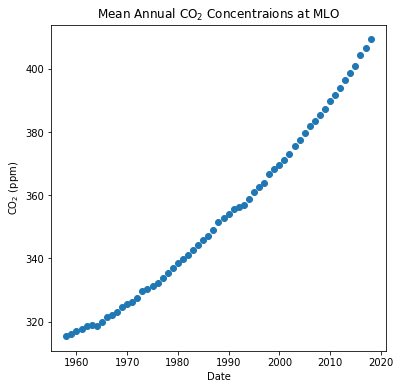

In [26]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at MLO')

### Now I have a choose your own path game!  If you want to try and see how you can change graphs 

If you want to play with colors and symbols we will do that here.  Or if you want to do line fitting jump below.  Hopefully we have time for both!

Matplotlib controls all the python plotting.  here is the website for scatter plots.  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

First you can change the colors by setting "c="  Here are a good list of colors.https://matplotlib.org/2.0.2/examples/color/named_colors.html

But even more fun is using xkcd colors described here https://blog.xkcd.com/2010/05/03/color-survey-results/  with more here  https://xkcd.com/color/rgb/



Then you can also change the symbols https://matplotlib.org/api/markers_api.html

Text(0.5,1,'Mean Annual CO$_2$ Concentraions at MLO')

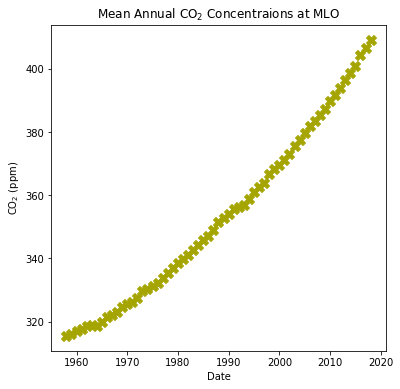

In [38]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y,c='xkcd:puke',marker="X",s=100)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at MLO')

## But now to do some math.  We are going to use a function to try and fit a straight line
We will first set the fit_order which is the order of the equation.   A straight line is first order.

next we make an array of x values from the min to max of the data using linslace

finally we use polyfit and poly1d to make the equation.  

Then we can make our predicted or y_fit values from the equation and the x_fit data

Then since we are making a line we use ax.plot


Text(0.5,0,'Year')

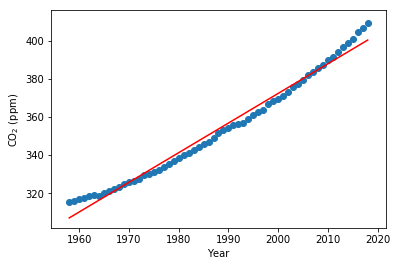

In [57]:
fit_order=1

fig,ax=plt.subplots()

x_fit=np.linspace(x.min(),x.max())  #I set the range using the data
a=np.polyfit(x,y,fit_order)  #I just copied from above to have in the same cell
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

ax.plot(x_fit,y_fit,c='red')
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

### You can see that the CO$_2$data is not linear!  
Go back and change the fit_order to 2.  Plus lets add the equation to the title of the graph so we can see what it is.  


Text(0.5,1,'CO$_2$=         2\n0.01293 x - 49.85 x + 4.835e+04')

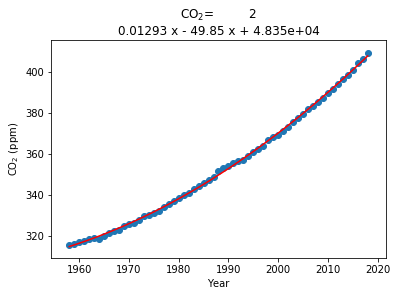

In [56]:
fit_order=2

fig,ax=plt.subplots()

x_fit=np.linspace(x.min(),x.max())  #I set the range using the data
a=np.polyfit(x,y,fit_order)  #I just copied from above to have in the same cell
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

ax.plot(x_fit,y_fit,c='red')
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

textstr='CO$_2$={}'.format(np.poly1d(a))
ax.set_title(textstr)

## Great Job today and I hope you learned some about CO$_2$!!!!

If you are done early you can go back and try data from a different site!  